In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [0]:
var=pd.read_csv('/content/wbcd.csv')

dummies = {'B': 1, 'M': 0}
var['diagnosis'] = var['diagnosis'].map(dummies)

del var['id']
y=var.diagnosis
del var['diagnosis']
X=var

In [0]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.20)

In [0]:
from sklearn.linear_model import LogisticRegression
lgreg_classifier=LogisticRegression(random_state=0)

from sklearn.svm import SVC
linearsvm_classifier = SVC(kernel = 'linear', random_state = 0)
nonlinearsvm_classifier = SVC (kernel = 'rbf', random_state = 0)

from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5) 

from sklearn.naive_bayes import GaussianNB
nb_classifier= GaussianNB()

from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

from sklearn.ensemble import RandomForestClassifier
forest_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [5]:
lgreg_classifier.fit(X_train,y_train)
linearsvm_classifier.fit(X_train,y_train)
nonlinearsvm_classifier.fit(X_train,y_train)
knn_classifier.fit(X_train,y_train)
nb_classifier.fit(X_train,y_train)
tree_classifier.fit(X_train,y_train)
forest_classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
LOGISTIC =  lgreg_classifier.predict(X_test)
svmlinear=  linearsvm_classifier.predict(X_test)
KNN      =  knn_classifier.predict(X_test)
NB       =  nb_classifier.predict(X_test)
TREE     =  tree_classifier.predict(X_test)
FOREST   =  forest_classifier.predict(X_test)
svmnon   =  nonlinearsvm_classifier.predict(X_test)

In [7]:
from sklearn.metrics import classification_report, confusion_matrix  ,accuracy_score
from sklearn.model_selection import train_test_split

logistic=accuracy_score(LOGISTIC,y_test)
print('Logistic------------------>',logistic)

linearac=accuracy_score(svmlinear,y_test)
print('Linear SVM---------------->',linearac)

nonlinearac=accuracy_score(svmnon,y_test)
print('Non Linear SVM------------>',nonlinearac)

knnac=accuracy_score(KNN,y_test)
print('KNN----------------------->',knnac)

treeac=accuracy_score(TREE,y_test)
print('Decision Tree------------->',treeac)

forestac=accuracy_score(FOREST,y_test)
print('Random Forest------------->',forestac)

nbac=accuracy_score(NB,y_test)
print('NB Classifier------------->',nbac)

Logistic------------------> 0.9473684210526315
Linear SVM----------------> 0.9473684210526315
Non Linear SVM------------> 0.9298245614035088
KNN-----------------------> 0.9385964912280702
Decision Tree-------------> 0.9122807017543859
Random Forest-------------> 0.9473684210526315
NB Classifier-------------> 0.9649122807017544


[0.04089477 0.0137291  0.02247241 0.02142348 0.00599226 0.00476296
 0.0629201  0.12352581 0.00260849 0.0028349  0.02403988 0.00244983
 0.01514812 0.13589424 0.00802209 0.00075484 0.00698898 0.00682277
 0.00637568 0.00759954 0.04620269 0.0209981  0.11088355 0.09392955
 0.01091154 0.01072042 0.01681816 0.14474489 0.01289386 0.01663698]


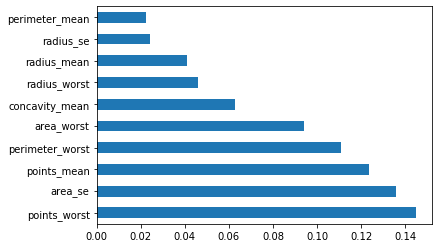

In [8]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
model.fit(X_train,y_train)
print(model.feature_importances_)
predictions=  model.predict(X_test)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()